# Introduction to Machine Learning (CSCI-UA.473)

## Lab 5: SVM recap, Decision Trees and Random Forests
### Date: March 9th, 2022

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics, model_selection, tree
import matplotlib.pyplot as plt
BLUE, ORANGE, GRAY = '#57B5E8', '#E69E00', '#646369'

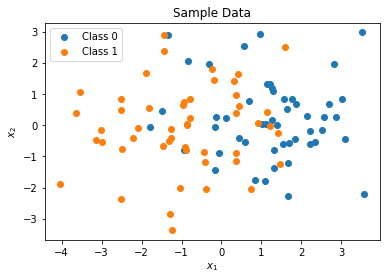

In [2]:
"""
Input:
    N : the number of data points

Output:
    X, y : the features and targets of shapes (N,2) and (N, )
"""
def sample_bimodal_data(N):
    
    # The two modes and covariances.
    mu1 = np.asarray([1, 0])
    mu2 = np.asarray([-1, 0])
    
    cov1 = 2 * np.identity(2)
    cov2 = 2 * np.identity(2)
    
    N1 = N//2   # Number of points in first class.
    N2 = N - N1 # Number of points in second class.
    
    # Sample the random points.
    X1 = np.random.multivariate_normal(mu1, cov1, N1)
    X2 = np.random.multivariate_normal(mu2, cov2, N2)
    Y1 = np.zeros(N1)
    Y2 = np.ones(N2)
    
    # Combine the data.
    X = np.vstack((X1, X2))
    Y = np.concatenate((Y1, Y2), axis = None)
    
    return X,Y

# Plot the sample data.
N = 100
X,Y = sample_bimodal_data(N)

plt.figure(1)
plt.scatter(X[:N//2, 0], X[:N//2, 1], label = 'Class 0')
plt.scatter(X[N - N//2:, 0], X[N - N//2:, 1], label = 'Class 1')
plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Sample Data');

In [3]:
# First get the data and split it into training and testing.

N = 100
X, Y = sample_bimodal_data(N)

# Use a 70/30 split
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size = 0.30, random_state = 981)

SVM accuracy = 90.0%


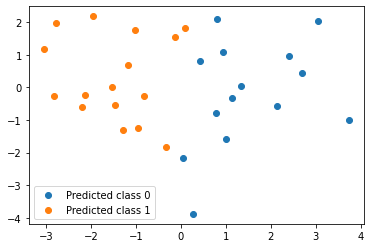

In [4]:
# Define the SVM model to use with a slack variable
svm = LinearSVC(C = 1e-10, dual = False)
svm.fit(X_train, Y_train)
svmpred = svm.predict(X_val)
acc = metrics.accuracy_score(Y_val, svmpred)
print('SVM accuracy = {:0.1f}%'.format(100*acc))

plt.figure(2)
I = svmpred == 0
plt.scatter(X_val[I, 0], X_val[I, 1], label = 'Predicted class 0')
I = svmpred == 1
plt.scatter(X_val[I, 0], X_val[I, 1], label = 'Predicted class 1')
plt.legend()
plt.show()

In [5]:
"""
Input:
    N : the number of data points

Output:
    X, y : the features and targets of shapes (N,2) and (N, )
"""
def gen_data1(N):
    N1 = N//2
    N2 = N - N1
    t = np.linspace(0, 2*np.pi, N1)
    
    X1 = np.zeros((N1, 2))
    X1[:,0] = 4*np.cos(t) + 0.1*np.random.randn(N1)
    X1[:,1] = 4*np.sin(t) + 0.1*np.random.randn(N1)
    y1 = np.zeros(N1)
    
    X2 = np.random.randn(2*N2)
    X2 = X2.reshape((N2, 2))
    y2 = np.ones(N2)

    # Combine the data.
    X = np.vstack((X1, X2))
    y = np.concatenate((y1, y2), axis = None) # axis = None means that arrays flattened before use
    
    return X,y

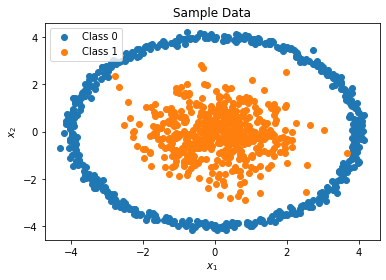

In [6]:
# Plot the data.
N = 1000
X, Y = gen_data1(N)

plt.figure(3)
plt.scatter(X[:N//2, 0], X[:N//2, 1], label = 'Class 0')
plt.scatter(X[N - N//2:, 0], X[N - N//2:, 1], label = 'Class 1')
plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Sample Data');

SVM accuracy = 38.3%


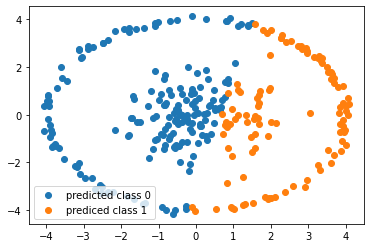

In [7]:
# Define the different SVM models to use
# Use a 70/30 split
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 981)
svm = LinearSVC(C = 1e+10, dual = False)
svm.fit(X_train, Y_train)
svmpred = svm.predict(X_val)
acc = metrics.accuracy_score(Y_val, svmpred)
print('SVM accuracy = {:0.1f}%'.format(100*acc))

plt.figure(2)
I = svmpred == 0
plt.scatter(X_val[I, 0], X_val[I, 1], label = 'predicted class 0')
I = svmpred == 1
plt.scatter(X_val[I, 0], X_val[I, 1], label = 'prediced class 1')
plt.legend()
plt.show()

Here the data is not linearly separable although we can very clearly see some separation. If we transform the data by only looking at the radius, then we would be able to linearly separate the data. We will visit this in the next lecture when we talk about kernel SVM's which are much more flexible models and can handle a wider array of datasets.

(1000, 2)


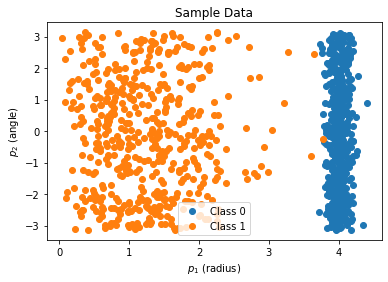

In [8]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return (rho, phi)

pX = np.vstack(cart2pol(X[:, 0], X[:, 1])).T
print(pX.shape)
plt.figure(4)
plt.scatter(pX[:N//2, 0], pX[:N//2, 1], label = 'Class 0')
plt.scatter(pX[N - N//2:, 0], pX[N - N//2:, 1], label = 'Class 1')
plt.legend()
plt.xlabel(r'$p_1$ (radius)')
plt.ylabel(r'$p_2$ (angle)')
plt.title('Sample Data')
plt.show()

In [9]:
# Define the different SVM models to use
# Use a 70/30 split
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(pX, Y, test_size = 0.3, random_state = 981)
svm = LinearSVC(C = 1e+10, dual = False)
svm.fit(X_train, Y_train)
svmpred = svm.predict(X_val)
acc = metrics.accuracy_score(Y_val, svmpred)
print('SVM accuracy = {:0.1f}%'.format(100*acc))

SVM accuracy = 99.7%


## Moving on to decision trees.. they are good for classifying nonlinear data

DecisionTreeClassifier(criterion='entropy')

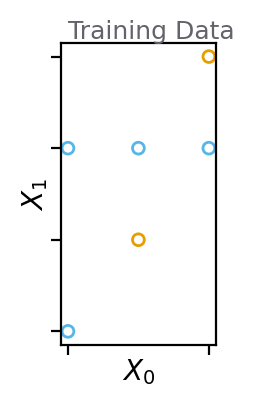

In [10]:
# Lets first create a basic decision tree for a very basic dataset!

#Our training data X is composed of two features, and our predictions are binary (0 or 1)
X = np.array([[0, 0], [1, 1], [2,2], [2,3], [0,2], [1,2]])
Y = np.array([0, 1, 0, 1, 0, 0 ])

def plot_data(X, Y):
    fig, ax = plt.subplots(figsize=(1, 6), dpi=200)
    ax.set_aspect(1.3)
    ax.scatter(X[:, 0], X[:, 1], s=18, facecolors='none',
               edgecolors=np.array([BLUE, ORANGE])[Y])
    ax.tick_params(
        bottom=True, left=True, labelleft=False, labelbottom=False)
    ax.text(0, 3.2, 'Training Data', color=GRAY, fontsize=9)
    ax.set_xlabel(r'$X_0$')
    ax.set_ylabel(r'$X_1$')
    return fig, ax

_, _ = plot_data(X, Y)

# Default splitting is done using Gini impurity, we will use entropy for our exercise.
# another crieterion other than impurity
clf = tree.DecisionTreeClassifier(criterion="entropy") 
clf.fit(X,Y)




In [11]:
test_X = 3 + 2.5 * np.random.randn(50, 2)
clf.predict(test_X)

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1])

In [12]:
# We can also see the probability with which the classifier assigns each class for every sample
clf.predict_proba(test_X)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [13]:
# The decision tree seems to be pretty confident on all of its predictions. Any ideas how we can confuse it?
# HINT : Here probabilty can be thought of as the number of samples in the leaf node with the same class

4


<Figure size 432x288 with 0 Axes>

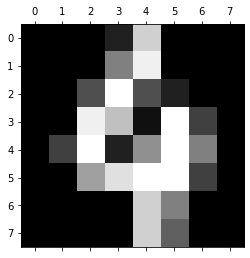

In [14]:
# This was just a programmatic dataset, lets try the decision tree on a more meaningful one
from sklearn.datasets import load_digits
import graphviz

# We use the digits dataset provided by sklearn, this is similar to MNIST but much coarser (8x8) and 
# thus a lot lighter than MNIST (28x28)
dataset = load_digits()
X, Y = dataset.data, dataset.target
idxs = np.arange(0, len(X))
np.random.shuffle(idxs)
train_idxs,test_idxs = idxs[:1500], idxs[1500:]
train_X, train_Y = X[train_idxs], Y[train_idxs]
test_X, test_Y = X[test_idxs], Y[test_idxs]
plt.gray()
plt.matshow(dataset.images[100])
print(dataset.target[100])



In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_X, train_Y)
dot_data = tree.export_graphviz(clf, out_file='graph.dot', 
                      feature_names=dataset.feature_names,  
                      class_names=str(dataset.target_names),  
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)
!dot -Tpng graph.dot -o graph.png

In [38]:
# Predict using the fitted decision tree
preds = clf.predict(test_X)

In [39]:
print(np.sum(preds == test_Y)/len(preds))

0.8451178451178452


In [40]:
# This was your vanilla Decision trees, now lets look at Bagging.
from sklearn.ensemble import BaggingClassifier

# Remember, Bagging is just using an ensemble of decision trees to add more variance to your model.
# So we simply wrap our original DecisionTreeClassifier with a BaggingClassifier module.
clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='gini'),
                       n_estimators=100, max_samples=1.0, max_features=0.5,bootstrap=True)
clf = clf.fit(train_X, train_Y)
# What would setting n_estimators as 1 mean?
# Changing the value for n_estimators changes our accuracy


In [41]:
preds = clf.predict(test_X)

In [42]:
print(np.sum(preds == test_Y)/len(preds))

0.9663299663299664


In [32]:
# Random forests
from sklearn.ensemble import RandomForestClassifier

# Now we try RandomForests on the same data. Again, RandomForests is just a method to ensemble your base models
# and will be used in the same way bagging was.
clf = RandomForestClassifier(n_estimators=100, max_samples=1.0, max_features=0.5,bootstrap=True, criterion='gini')
clf.fit(train_X, train_Y)


RandomForestClassifier(max_features=0.5, max_samples=1.0)

In [33]:
preds = clf.predict(test_X)

In [34]:
print(np.sum(preds == test_Y)/len(preds))

0.9595959595959596


In [35]:
# Next we implement gradient boosting, in particular the Adaboost algorithm.
# Remember, gradient boosting algorithms involve iteratively improving the decision trees
# and hence involve a learning rate similar to logistic regressions.
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))


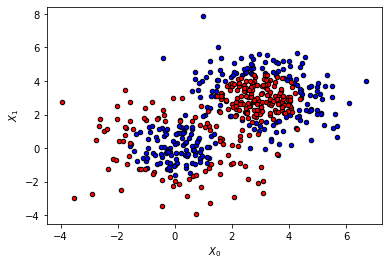

In [36]:
# Plot the training points
plot_colors = "br"
plot_step = 0.02
class_names = "AB"
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
    plt.xlabel(r'$X_0$')
    plt.ylabel(r'$X_1$')

In [ ]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=2000, learning_rate=1
)
bdt.fit(X, y)

In [ ]:
# Plot the decision boundaries
plt.subplot(111)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")
